<a href="https://colab.research.google.com/github/Noks06/Sales-Predictions-/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Predictions
 By Nokuthula Mchunu

## Loading and Explore Data

In [2]:
from numpy.core.overrides import set_array_function_like_doc
#importing pandas and numpy
import pandas as pd
import numpy as np
# Importing sklearn liberaries and tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import set_config

set_config(transform_output='pandas')

# Reading csv file to file variable fpath
fpath  = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/sales_predictions_2023.csv'
# load the dataframe
df = pd.read_csv(fpath)
# explore top 5 records
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Checking dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* The info above tells us that there are 8523 records, 12 columns.  
* 4 float64, 1 int64 and 7 object
* Item_Weight and Outlet_size have missing values


## Perform Basic EDA


### Check for Duplicate

In [4]:
# check if there are duplicate

df.duplicated().sum()

0

there are no duplicates

### Checking inconsistencies

In [5]:
# Checking inconsistancy in Numeric columns
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


Numeric values seems to be fine, there are no odd numbers or out of range but there are missing values on Item_weight

In [6]:
# droping unneccessary Columns

Required_df = df.drop(columns =['Item_Identifier'# quasi contant
,'Outlet_Establishment_Year' # has a (-) correllation
,'Item_Type']# quasi constant
)
#Required_Col
Required_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#Checking inconsitancy in Nominal Columns
cat_col = Required_df.select_dtypes('object').columns
cat_col


Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [8]:
# Checking the value counts of all categorical  columns
for col in cat_col:
  print(Required_df[col].value_counts())
  print('')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



In [9]:
# Correcting the inconsistancy by using a replace method
Required_df['Item_Fat_Content']= Required_df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
# Rechecking the consistancy
Required_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Identifying Target(y) and Feature(X)

In [10]:
# specifying the target
y= Required_df['Item_Outlet_Sales']
# specifying X features
X = Required_df.drop(columns ='Item_Outlet_Sales')
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1


In [11]:
X['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
#perfoming the split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42)


## Performing PreProcessing

### Pipeline for preprocessing numeric columns

In [13]:
# identify Numeric columns
X_train_NumCol  = X_train.select_dtypes('number').columns
X_train_NumCol

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [14]:
#checking missing values
X_train[X_train_NumCol].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP
count,5285.00,6392.00,6392.00
mean,12.90,0.07,141.98
std,4.64,0.05,62.63
min,4.56,0.00,31.29
25%,8.90,0.03,94.15
50%,12.65,0.05,144.11
75%,17.00,0.09,186.90
max,21.35,0.33,266.89


Item_weight has a missing values we are going to impute with a strategy = mean

In [15]:
#instantiating the imputer
num_imputer =SimpleImputer(strategy='mean')
num_scaler = StandardScaler()


In [16]:
#Create pipeline
num_pipe =make_pipeline(num_imputer,num_scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [17]:
#Creating tuples for num_col
num_tuple =('numeric',num_pipe,X_train_NumCol)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

### Pipeline for Preprocessing Nominal Feature

In [18]:
# Identifying Nominal Features
cat_col =X_train.select_dtypes('object').columns
cat_col

Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# Checking missing values
X_train[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Fat_Content      6392 non-null   object
 1   Outlet_Identifier     6392 non-null   object
 2   Outlet_Size           4580 non-null   object
 3   Outlet_Location_Type  6392 non-null   object
 4   Outlet_Type           6392 non-null   object
dtypes: object(5)
memory usage: 299.6+ KB


There are no missing values in categorical features so no need to impute

In [20]:
# check nominal stats
df.describe(include ='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [21]:
# instantiate the one-hot-encoder
cat_one_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


In [22]:
# Creating pipeline
cat_pipe  =make_pipeline(cat_one_encoder)
cat_pipe


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [23]:
# creating tuple
cat_tuple  =('categorical',cat_pipe,cat_col)
cat_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

### Instantiating  Column Transformer

In [24]:
# instantiate ColumnTransformer

col_transformer = ColumnTransformer([num_tuple,cat_tuple],verbose_feature_names_out=False)

# fit the data to Transformer
col_transformer.fit(X_train)


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [25]:
X_train_processed = col_transformer.transform(X_train)
X_train_processed.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.82,-0.71,1.83,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.56,-1.29,0.60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.13,1.81,0.24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.17,-1.00,-0.95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.53,-0.97,-0.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.83,4.31,-0.04,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,0.64,1.01,-1.06,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5390,1.11,-0.92,1.52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,1.77,-0.23,-0.38,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# Checking if null still exists
X_train_processed.isna().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Item_Fat_Content_Low Fat         0
Item_Fat_Content_Regular         0
Outlet_Identifier_OUT010         0
Outlet_Identifier_OUT013         0
Outlet_Identifier_OUT017         0
Outlet_Identifier_OUT018         0
Outlet_Identifier_OUT019         0
Outlet_Identifier_OUT027         0
Outlet_Identifier_OUT035         0
Outlet_Identifier_OUT045         0
Outlet_Identifier_OUT046         0
Outlet_Identifier_OUT049         0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Size_nan                  0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64

In [27]:
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [28]:
# transforming X_test
X_test_processed =col_transformer.transform(X_test)
X_test_processed.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.33,-0.78,-1.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.18,0.10,-1.59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.38,-0.48,-1.60,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,0.00,-0.42,0.51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.64,-1.05,0.89,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,1.11,-1.13,0.47,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4836,-0.64,-1.29,0.02,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8064,-1.14,1.22,1.09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4418,-1.50,-0.78,-0.37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


there are no more null values , data has been scaled successfully

## CRISP-DM Phase 4 - Modeling

In [29]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


### Linear Regression

In [30]:
# importing relevent libraries for linear Regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg


LinearRegression()

In [31]:
#fit the training set
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [32]:
 # Test function with default arguments
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 848.087
- MSE = 1,299,826.729
- RMSE = 1,140.099
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 802.472
- MSE = 1,187,071.833
- RMSE = 1,089.528
- R^2 = 0.570


Model perform not too good and not bad either both testing and training set are above 0.5 and they are close and test set perfomed better that training set. Model underfit when could not predict and score is way below 0.5 , around 0.35 when looking at R^2 in this case it is sligtly above 0.5. and it is over fitting if training set have a perfect score or close to perfect and testing set perform poorly.

### Bagging Tree

In [33]:
# importing relevent libraries
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor


# instantaite Bagging Regressor
bag_reg = BaggingRegressor(random_state=42)

# make a Bagging Pipeline
bag_reg_pipe =make_pipeline(col_transformer,bag_reg)

# fit the training set to BaggingRegretor
bag_reg.fit(X_train_processed, y_train)

# predict and evaluate
evaluate_regression(bag_reg_pipe, X_train, y_train, X_test, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 323.385
- MSE = 242,809.072
- RMSE = 492.757
- R^2 = 0.918

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 795.922
- MSE = 1,306,988.788
- RMSE = 1,143.236
- R^2 = 0.526


The model is overfiting , it has perform well on training set but poorly on a testing set

### Random  Forest Model

#### Default Random Forest

In [34]:
# instantiate Random Forest
rf = RandomForestRegressor(random_state =42)
# create pipeline
rf_pipe = make_pipeline(col_transformer,rf)

#fittraining set to pipeline
rf_pipe.fit(X_train,y_train)
rf_pipe
#evaluate
evaluate_regression(rf_pipe,X_train, y_train,X_test,y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.494
- MSE = 183,709.103
- RMSE = 428.613
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 768.494
- MSE = 1,218,704.899
- RMSE = 1,103.950
- R^2 = 0.558


* The model is underfitting if model could not able to predicts a single value to the true value. The model is overfitting if the model predict the perfect score on training set and perform poorly to the test set. in this case model is overfitting.  

* Comparing linear regression model and Default Random Forest model, Linear regression perfomed better than Default Random  Forest on the testing set with R^2 of 0.57 compare to R^2 of 0.556 of Random Forest



#### Tune with GridSearchCV

In [35]:
# Check the parameter of the pipeline
rf_pipe.get_params()
#gs_Cv = GridSearchCV()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type'],
         dtype='object'))],
                     verbos

In [36]:
# Defining Parameter
rf_params = {'randomforestregressor__max_depth': [None,5,10,15,20],
          'randomforestregressor__n_estimators':[100,150],
          'randomforestregressor__min_samples_leaf':[5,6,7,8,9],
          'randomforestregressor__oob_score':[True,False],
          }

In [37]:
#Instantiate gridseach
gs = GridSearchCV(rf_pipe, rf_params, n_jobs=-1, verbose=1)

#fit training set
gs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        spars...
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 5, 10, 15,
                                                              20],
                         'randomforestregressor__min_samples_leaf': [5, 6, 7, 8,
                                                                     9],
                         'randomforestregressor__n_estimators': [100, 150],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [38]:
# Getting the best params of the grid

gs.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 8,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__oob_score': True}

In [39]:
#Define, Refit, and Evaluate the Best Model
bestrf =gs.best_estimator_
# re- evaluate the model
evaluate_regression(bestrf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 756.427
- MSE = 1,157,408.215
- RMSE = 1,075.829
- R^2 = 0.609

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 728.144
- MSE = 1,091,982.756
- RMSE = 1,044.980
- R^2 = 0.604


* The perfomance improved on test set of Fine tuned model compare to default model with R^2 showing 0.604 vs  0.558 of default model

## CRISP-DM Phase 5 - Evaluation

I personaly recommend Fine Tuned Random Forest model, even though linear regression model gave best perfomance between train and test set with test set having better score, If we continue tunining the parameter we can get better result.

Overall the model predicted over 60 percent of sales which is a good prediction compare to other models that we used.

* When we look at MAE which is measure of accuracy that the model has predicted, on average it shows that the model's prediction was off by R728.14 sales on a test set and R756.43 on train set.
* The reason I chose MAE is that it is easy to interprete and it penelises errors.


 The model tend to underfit if it fails to give, predict and the reason could be that there was too little information to test on and it tends to overfit if the training set perform better than test set, in the case of this fine-tuned Random Model, the R^2 score seems to be predicting good score.  

## Deployment

### Visualization

In [43]:
# import librarie
import matplotlib.pyplot as plt
import seaborn as sbn

In [44]:
Required_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


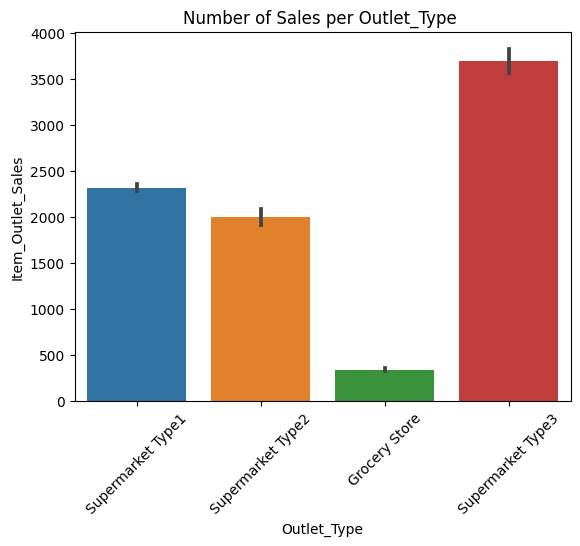

In [49]:
# ploting the visualizasion
ax = sbn.barplot(data = Required_df, x='Outlet_Type', y ='Item_Outlet_Sales')
ax.set_title('Number of Sales per Outlet_Type ')
ax.tick_params(axis ='x', rotation =45)


The graph above shows that Supermarket Type 3 has the highest sales of more that $3500 we are expecting prediction to show that Type 3 Supermakert to have high Sales among other outlet type

In [50]:
# Using the heatmap to show the correlation of numeric features to target
cor = Required_df.corr(numeric_only=True)
cor.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.13
Item_MRP,0.03,-0.00,1.00,0.57
Item_Outlet_Sales,0.01,-0.13,0.57,1.00


<Axes: >

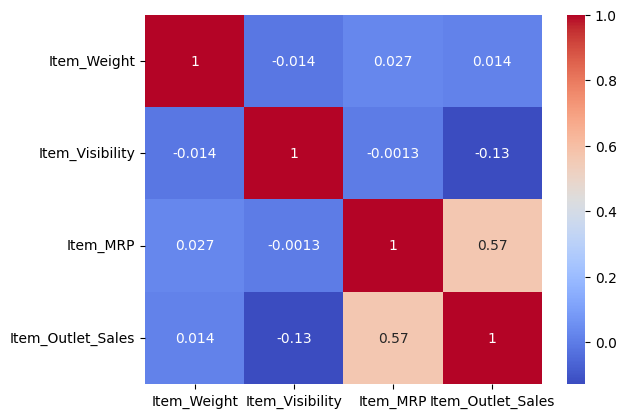

In [54]:
#Plot the graph
sbn.heatmap(cor, cmap ='coolwarm', annot =True)

Corralation graph shows that there is high correlation between Item_Outlet_Sales and Item_MRP and Item_Visibility has got no impact on the amount of sales.  